# Hourly energy demand generation and weather


In this notebook I will be analyzing two data sets 1) energy_dataset.csv, and 2) weather_features.csv, which can be found here: https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather 

My aim is to explore the energy market in Spain and try to predict the next hour's electricity price. 

* the weather_features.csv : hourly weather conditions such as temperature, rain, humidity etc. in five different cities in Spain (Madrid, Barcelona, Valecia, Seville, and Bilbao)

* the energy_dataset.csv : hourly energy production (MWh) in Spain from different sources such as oil, wind energy, fossil fuels etc. The total production on the Spanish grid and the price of energy are, also, included. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
dataframe_weather = pd.read_csv('weather_features.csv', parse_dates = ['dt_iso'])

dataframe_energy = pd.read_csv('energy_dataset.csv', parse_dates = ['time'])

In [3]:
dataframe_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### Energy dataset

In [4]:
dataframe_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
# dropping columns with zeros or non available information

dataframe_energy = dataframe_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], axis=1)

In [6]:
dataframe_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04


In [7]:
dataframe_energy.describe().round(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.00,35046.00,35045.00,35045.00,35045.00,35046.00,35047.00,35046.00,35046.00,35046.00,35045.00,35046.00,35028.00,35064.00,35064.00
mean,383.51,448.06,5622.74,4256.07,298.32,475.58,972.12,2605.11,6263.91,60.23,85.64,1432.67,269.45,5464.48,28696.94,49.87,57.88
std,85.35,354.57,2201.83,1961.60,52.52,792.41,400.78,1835.20,839.67,20.24,14.08,1680.12,50.20,3213.69,4574.99,14.62,14.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18041.00,2.06,9.33
25%,333.00,0.00,4126.00,2527.00,263.00,0.00,637.00,1077.25,5760.00,53.00,73.00,71.00,240.00,2933.00,24807.75,41.49,49.35
50%,367.00,509.00,4969.00,4474.00,300.00,68.00,906.00,2164.00,6566.00,57.00,88.00,616.00,279.00,4849.00,28901.00,50.52,58.02
75%,433.00,757.00,6429.00,5838.75,330.00,616.00,1250.00,3757.00,7025.00,80.00,97.00,2578.00,310.00,7398.00,32192.00,60.53,68.01
max,592.00,999.00,20034.00,8359.00,449.00,4523.00,2000.00,9728.00,7117.00,106.00,119.00,5792.00,357.00,17436.00,41015.00,101.99,116.80


In [8]:
dataframe_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [9]:
# Converting feature 'time' from an object to an index

dataframe_energy['time'] = pd.to_datetime(dataframe_energy['time'], utc = True)
dataframe_energy= dataframe_energy.set_index('time')


In [10]:
dataframe_energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04


In [11]:
#Checking for non available numbers (NaNs)
missing_values = dataframe_energy.isnull().values.sum()
print(f'The number of missing values are:', missing_values)

The number of missing values are: 292


In [12]:
#Checking for duplicate values 
dublicate_values = dataframe_energy.duplicated(keep = 'first').sum()
print(f'The number of duplicate values are:',dublicate_values)

The number of duplicate values are: 0


In [13]:
dataframe_energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905,49.874341,57.884023
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,101.990000,116.800000


In [14]:
#Check where the null numbers all located and the total number of them in each column
dataframe_energy.isnull().sum(axis=0)

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

##### Missing values

The majority of our missing values are in the 'total load actual' feauture.

In [15]:
import seaborn as sns 

#function to plot different types of time-series
def plot_series(dataframe=None, column=None, time_series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    '''Visualization of time-series. Can target a specific column. 
    Inputs: "dataframe", "column","time_series", "x_axis", "y_axis", 
    "title", "start", and "end". 
    Output: Time series graph'''
    sns.set()
    fig = plt.figure(figsize=(30, 12)) 
    ax = fig.subplots()
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(dataframe[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if time_series.any():
        ax.plot(time_series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

<ipython-input-15-fca1cd5799b8>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(dataframe=None, column=None, time_series=pd.Series([]),


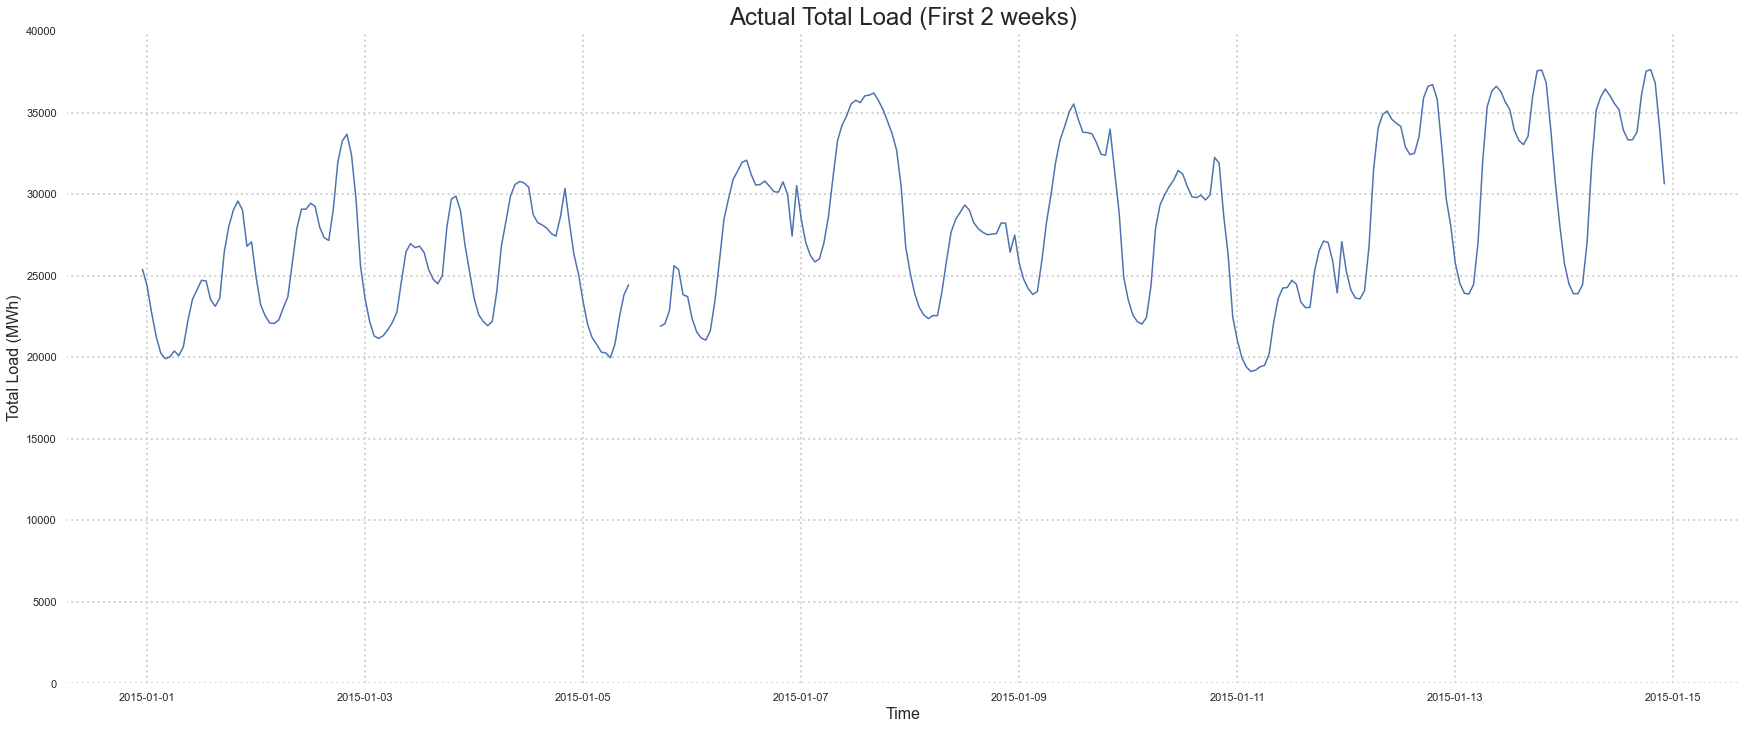

In [16]:
#Plot the 'total load actual' in time
ax = plot_series(dataframe=dataframe_energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks)', end=24*7*2)
ax.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
ax.set_facecolor('white')
plt.ylim([0, 40000])
plt.show()

Missing values in between 2015/01/05 - 2015/01/07.

###### Check if the missing values coincide across the different columns.

In [17]:
# Display the last rows with null values 

dataframe_energy[dataframe_energy.isnull().any(axis=1)].tail()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2016-11-23 03:00:00+00:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,43.19,49.11
2017-11-14 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,60.53,66.17
2017-11-14 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,68.05,75.45
2018-06-11 16:00:00+00:00,331.0,506.0,7538.0,5360.0,300.0,1.0,1134.0,4258.0,5856.0,52.0,96.0,170.0,269.0,9165.0,NaN,69.87,64.93
2018-07-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.01,69.79


In [18]:
#Use interpolation to fill in the missing values

dataframe_energy.interpolate(method='linear', limit_direction='forward', 
                             inplace=True, axis=0)

In [19]:
#Checking for non-zero values
dataframe_energy.astype(bool).sum(axis=0)

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64

#### Weather dataset

In [20]:
dataframe_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [21]:
dataframe_weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


* There is one outlier in the 'pressure' feature, 1008371 hPa is too high for it to be recordered on.

* There is also an outlier in the 'wind_speed'feature. Its maximum value 133 m/s is too high of a speed, such speeds have been recorded in Tornados. 

In [22]:
dataframe_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [23]:
# Changing objects into float 

def convert_datatypes(dataframe, convert_from, convert_to):
    columns = dataframe.select_dtypes(include=[convert_from]).columns
    for column in columns:
        dataframe[column]=dataframe[column].values.astype(convert_to)
    return dataframe

In [24]:
dataframe_weather = convert_datatypes(dataframe_weather, np.int64, np.float64)

In [25]:
# Change lable 'dt_iso' to 'time', convert it to datetime type, and set it as index

dataframe_weather['time'] = pd.to_datetime(dataframe_weather['dt_iso'], utc=True, infer_datetime_format=True)
dataframe_weather = dataframe_weather.drop(['dt_iso'], axis=1)
dataframe_weather = dataframe_weather.set_index('time')

In [26]:
#Split the 'dataframe_weather' to the five cities it encompasses , Madrid, Barcelona, Bilbao, Serville, and Valecia
#First, check the average weather in each city

avrg_weather_by_city = dataframe_weather.groupby('city_name').mean()

avrg_weather_by_city.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,289.848248,288.594704,291.021987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,286.378489,284.916661,288.036687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,293.105431,291.184103,295.962431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


In [27]:
# Check for missing values
print(dataframe_weather.isnull().values.sum())

dublicate_weather = dataframe_weather.duplicated(keep='first').sum()

print(dublicate_weather)

0
8622


In [28]:
# Check the number of rows in each dataframe

print(dataframe_energy.shape[0]) #energy 

cities = dataframe_weather['city_name'].unique()
grouped_weather = dataframe_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))
    

35064
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.


In [29]:
# create dataframe_weather_2 and drop duplicate rows 

dataframe_weather2 = dataframe_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                                    keep='last').set_index('time')
dataframe_weather = dataframe_weather.reset_index().drop_duplicates(subset=['time','city_name'],
                                                                   keep='first').set_index('time')

In [30]:
# 'weather_main', 'weather_description', and 'weather_id' almost similar information
# Check all the non- duplicate values in each to decide which one to drop

weather_description_nduplicate =  dataframe_weather['weather_description'].unique()
weather_description_nduplicate

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [31]:
# Check all the non duplicate values in column 'weather_main'

weather_main_nduplicate = dataframe_weather['weather_main'].unique()

weather_main_nduplicate

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [32]:
# Check all the non duplicate values in column 'weather_id'

weather_id_nduplicate = dataframe_weather['weather_id'].unique()

weather_id_nduplicate

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 211., 520., 300., 201., 741., 711., 301., 302.,
       721., 600., 616., 615., 601., 611., 311., 310., 620., 531., 602.,
       731., 761., 210., 771.])

The 'weather_main' is consisted of the less descriptive information compare to the 'weather_id' and 'weather_description'.

To check for the consistency of the data (as there are two diplicate rows) we would need to compare the two dataframes, 'dataframe_weather' and 'dataframe_weather2'. The can be done by finding the r-sqaured metric, after the features 'weather_description' and 'weather_main' are encoded.

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

def encode_r_squaered(dataframe_1, dataframe_2, feature, categorical=False):
    """calculates the r-squared value for two different dataframes
    of one feature/column, and then displays it. Parameters; dataframe_1,
    dataframe_2, feature the r_squared will be calculated, type of data
    (categorical or qualitative)"""
    dataframes = [dataframe_1,dataframe_2]
    if categorical:
        for dataframe in dataframes:
            label = LabelEncoder()
            dataframe[feature] = label.fit_transform(dataframe[feature])
        r_squared = r2_score(dataframe_1[feature], dataframe_2[feature])
        print("The r_squared value of {} is {}".format(feature, r_squared))

In [34]:
# Find r_squared for feature 'weather_description'
encode_r_squaered(dataframe_weather, dataframe_weather2, 'weather_description', categorical=True)

# Find r_squared for feature 'weather_main'
encode_r_squaered(dataframe_weather, dataframe_weather2, 'weather_main', categorical=True)

# Find r_squared for feature 'weather_id'
encode_r_squaered(dataframe_weather, dataframe_weather2, 'weather_id', categorical=False)

The r_squared value of weather_description is 0.972978840026219
The r_squared value of weather_main is 0.9627152451498913


From the test above, we can see that the three features seem to be the cause of the large number of duplicates in 'dataframe_weather'.
The r squared values are not comparable because they have first been encoded. 

In [35]:
# Drop features 'weather_main', 'weather_description', and 'weather_id'
dataframe_weather = dataframe_weather.drop(['weather_main', 
                                            'weather_description', 
                                            'weather_id', 
                                            'weather_icon'], axis=1)

In [36]:
# Check the r_squared for all features in datafram_weather and dataframe_weather2
dataframe_weather_cols = dataframe_weather.columns.drop('city_name')

for feature in dataframe_weather_cols:
    result = encode_r_squaered(dataframe_weather, dataframe_weather2, feature)
    print(result)
    

None
None
None
None
None
None
None
None
None
None
None


Therefore, most of the duplicates originate from the'weather_main' and 'weather_id'.

In [37]:
# Check for diplucate values in dataframe_weather

dataframe_weather_temp = dataframe_weather.reset_index().duplicated(subset=['time','city_name'],
                                                                   keep='first').sum()
print('dataframe_weather duplicate number of rows, except "time" and "city_name": {}'.format(dataframe_weather_temp))

dataframe_weather duplicate number of rows, except "time" and "city_name": 0


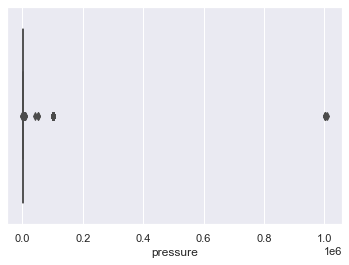

In [38]:
# Outliers in 'pressure' feature
import seaborn as sns

sns.boxplot(x=dataframe_weather['pressure'])
plt.show()

In [39]:
# Replace outliers as NaNs
dataframe_weather.loc[dataframe_weather.pressure > 1051, 'pressure'] = np.nan

dataframe_weather.loc[dataframe_weather.pressure < 931, 'pressure'] = np.nan


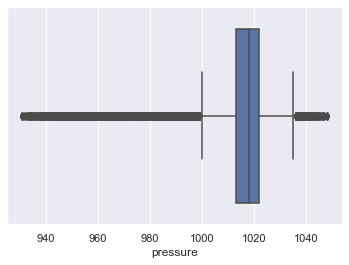

In [40]:
# Check again for outliers in 'pressure feature 
sns.boxplot(x=dataframe_weather['pressure'])
plt.show()

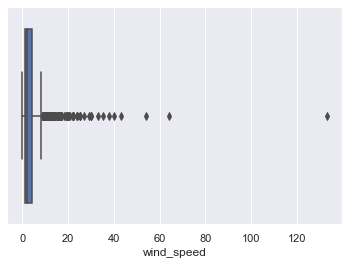

In [41]:
# Outliers in 'wind_speed' feature

sns.boxplot(x=dataframe_weather['wind_speed'])

plt.show()

In [42]:
# Replace outliers in 'wind_speed' with NaNs

dataframe_weather.loc[dataframe_weather.wind_speed > 50, 'wind_speed'] =np.nan

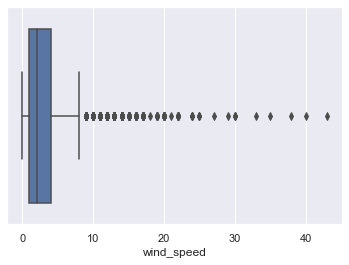

In [43]:
# Check again for outliers in 'wind_speed'

sns.boxplot(x=dataframe_weather['wind_speed'])
plt.show()

In [44]:
# Treat NaNs with intrepolation

dataframe_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

### Merge 'dataframe_energy' with 'dataframe_weather'

In [45]:
#Split the dataframe_weather into five, one for each city

dataframe_1, dataframe_2, dataframe_3, dataframe_4, dataframe_5 = [x for _, x in dataframe_weather.groupby('city_name')]
dataframes = [dataframe_1, dataframe_2, dataframe_3, dataframe_4, dataframe_5]

In [46]:
# Merge all dataframes into one

final_dataframe = dataframe_energy

for dataframe in dataframes:
    city = dataframe['city_name'].unique()
    city_string= str(city).replace("[", "")
    #print(city_string)
    city_string1 = city_string.replace("]", "")
    #print(city_string1)
    city_string2 =city_string1.replace("'", "")
    #print(city_string2)
    city_string3= city_string2.replace(" ", "")
    #print(city_string3) -> bug fix
    dataframe = dataframe.add_suffix('_{}'.format(city_string3))
    final_dataframe = final_dataframe.merge(dataframe, on=['time'], how='outer')
    final_dataframe = final_dataframe.drop('city_name_{}'.format(city_string3), axis=1)
    
    final_dataframe.columns

In [47]:
#Check for number of NaNs in final_dataframe

final_dataframe.isnull().values.sum()

0

In [48]:
# Check for duplicate rows in dataframe_energy

final_temp = final_dataframe.duplicated(keep='first').sum()
final_temp

0

In [49]:
final_dataframe.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0


## Visualize your data

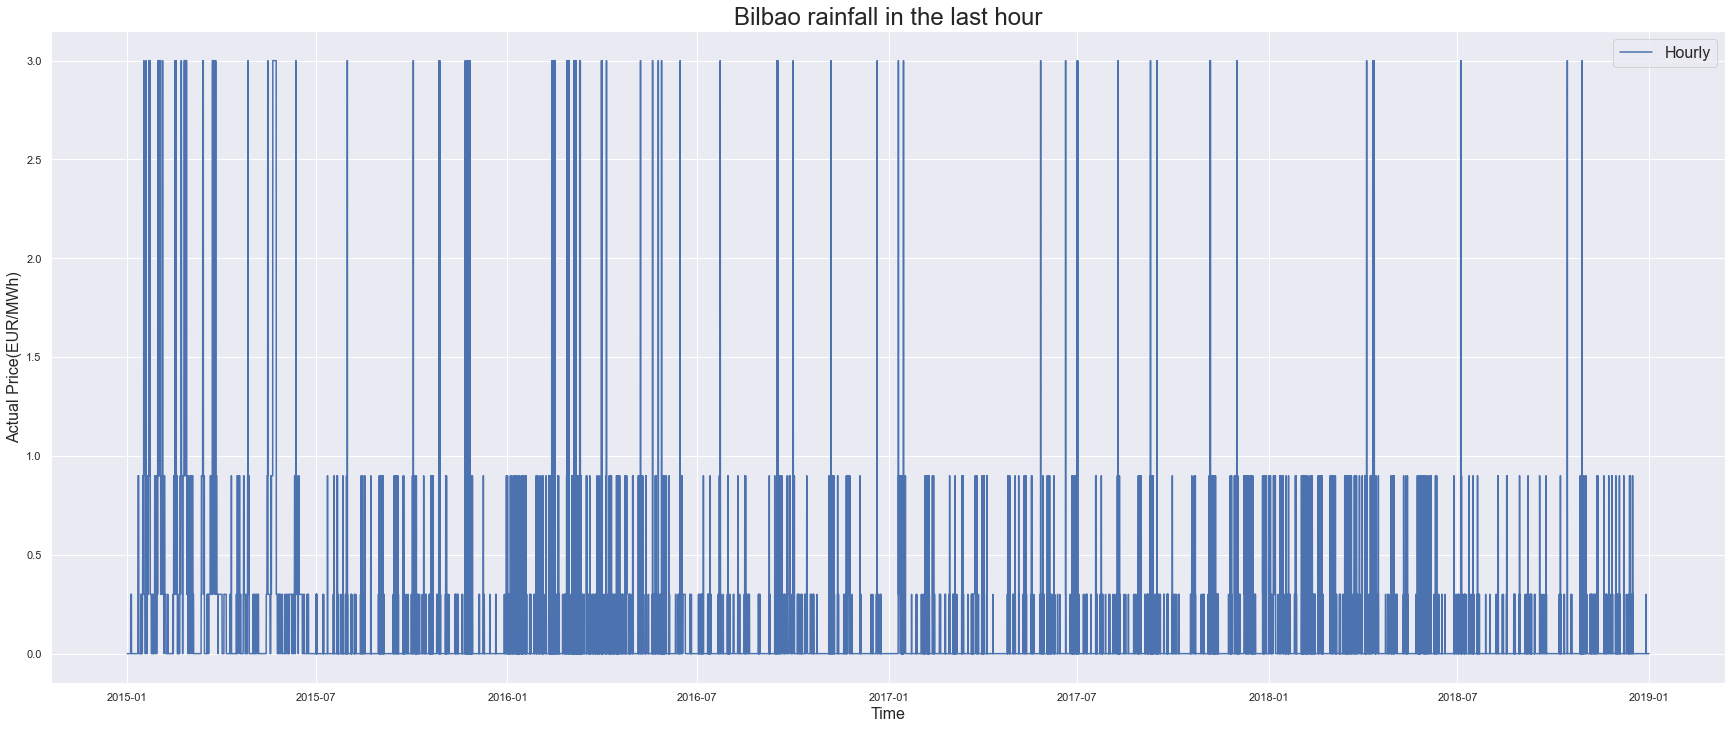

In [50]:
#Check 'rain_1h' for Bilbao

ax = plot_series(final_dataframe, "rain_1h_Bilbao", label = 'Hourly',
                ylabel='Actual Price(EUR/MWh)', title = 'Bilbao rainfall in the last hour')
plt.show()

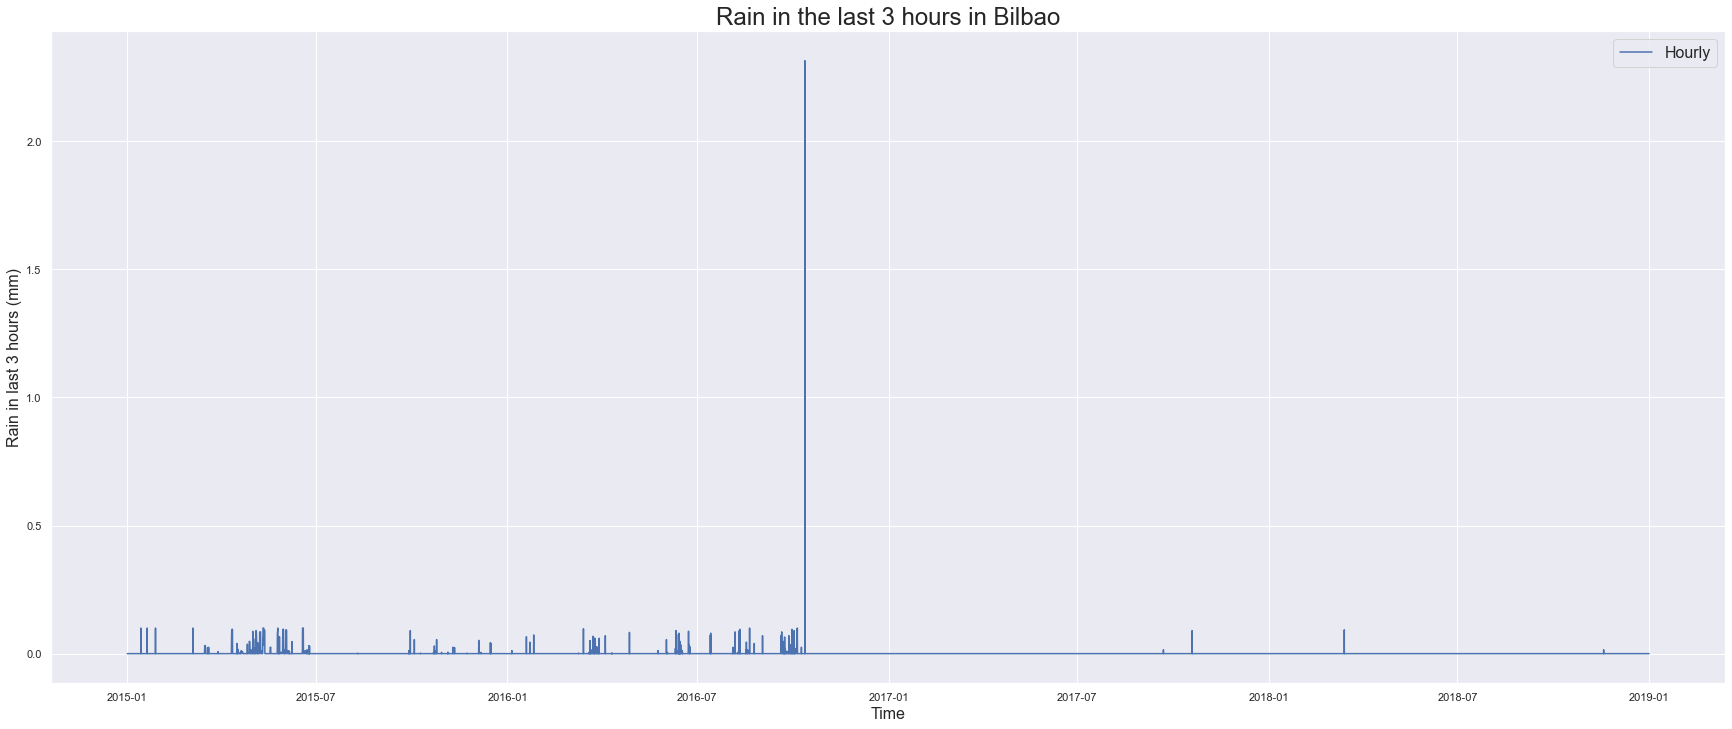

In [51]:
#Plot the 'rain_3h' for Bilbao

ax = plot_series(final_dataframe, "rain_3h_Bilbao", label = "Hourly", 
                 ylabel= "Rain in last 3 hours (mm)", title= "Rain in the last 3 hours in Bilbao")
plt.show()

In [52]:
# Drop feature 'rain_3h', due to its unreliability 
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    final_dataframe = final_dataframe.drop(["rain_3h_{}".format(city)], axis=1)

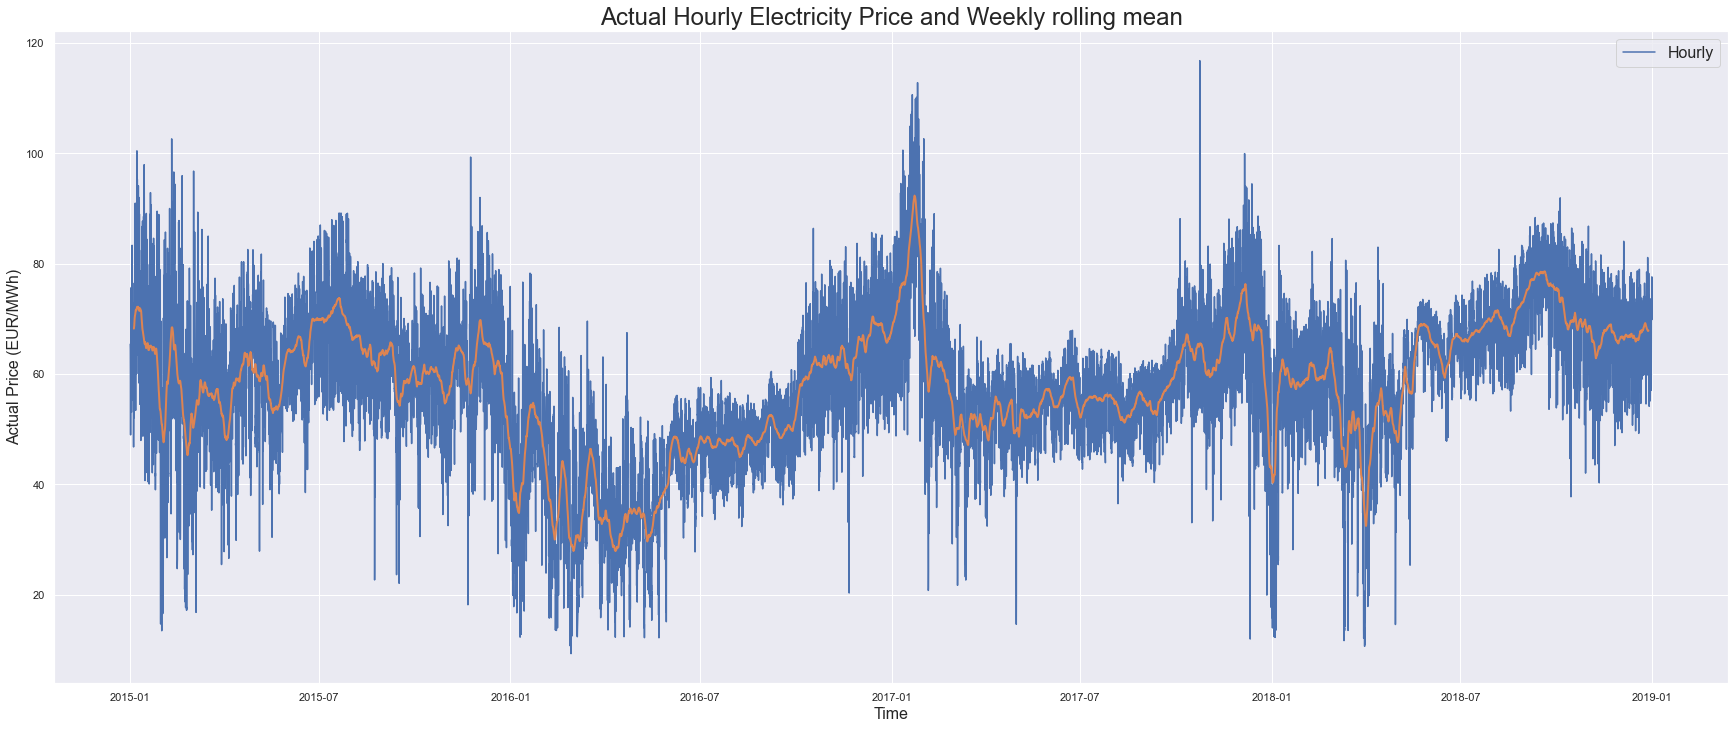

In [53]:
#Plot the hourly actual electricity price, along with the weekly rolling average (unweighted mean of the last n values)

rolling_mean = final_dataframe['price actual'].rolling(24*7, center=True).mean()
ax = plot_series(final_dataframe, 'price actual', label='Hourly', ylabel='Actual Price (EUR/MWh)',
                title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling_mean, linestyle='-', linewidth=2, label="Weekly rolling mean")
plt.show()

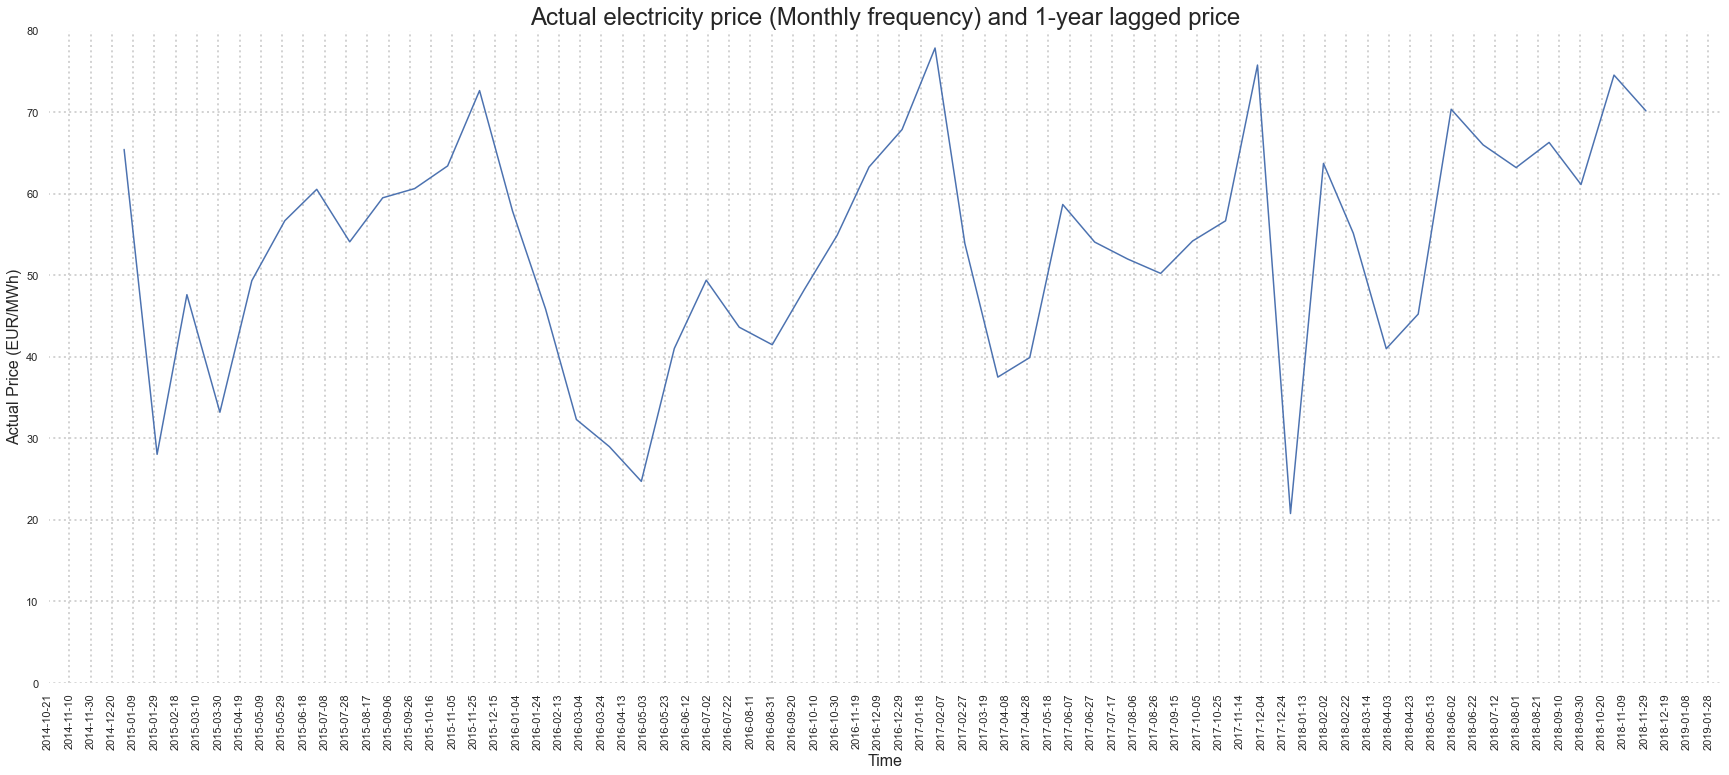

In [54]:
# Plot the electricity price (monthly frequence) along with its 1-year lagged series

monthly_price = final_dataframe['price actual'].asfreq('M')
ax = plot_series(time_series=monthly_price, ylabel='Actual Price (EUR/MWh)',
                title='Actual electricity price (Monthly frequency) and 1-year lagged price')
#shifted = final_dataframe['price actual'].asfreq('M').shift(12)
#ax.plot(shifted, label='Hourly')
ax.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
ax.set_facecolor('white')
plt.ylim([0, 80])
#ax.legend(['Actual Price', '1-year Lagged Actual Price'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
plt.xticks(rotation = 90)
plt.show()

Seasonal patterns can be observed, certain spikes are seen in the same months.

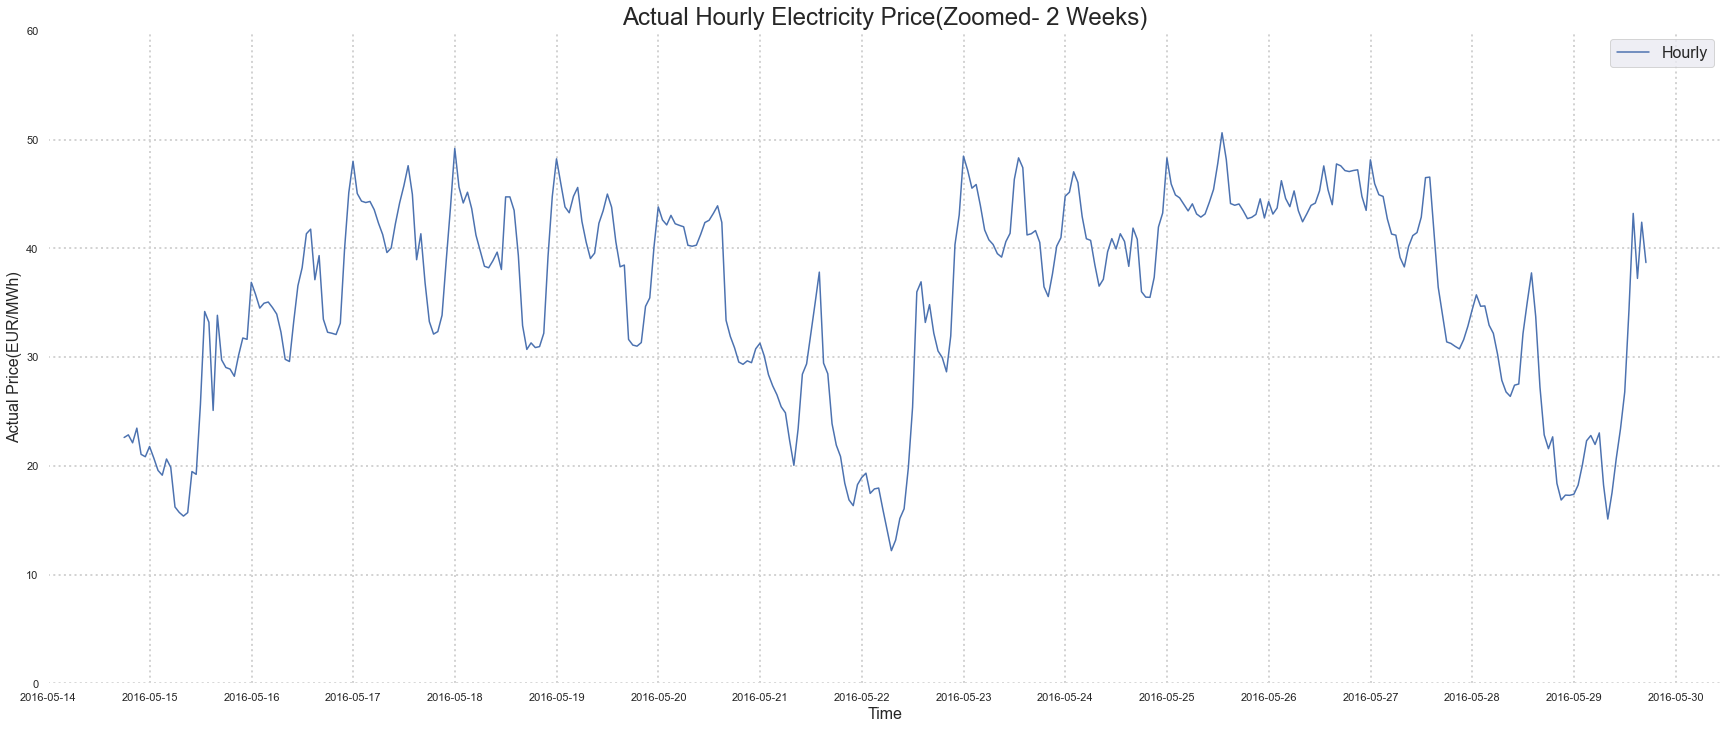

In [55]:
# Plot the actual electricity price at a daily/weekly scale
# Range - from Sunday 15/06/2016 at 00:00 to Sunday 29/06/2016 23:00

ax = plot_series(final_dataframe, 'price actual', label='Hourly', ylabel='Actual Price(EUR/MWh)',
                start=1+24*500, end=1+24*515, title='Actual Hourly Electricity Price(Zoomed- 2 Weeks)')
ax.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
ax.set_facecolor('white')
plt.ylim([0, 60])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.show()

Observations;
1) Weekly periodicity, price is higher during business days, lower during weekends, particularly on Sundays.

2) Daily periodicity, price is higher during the day versus the night.

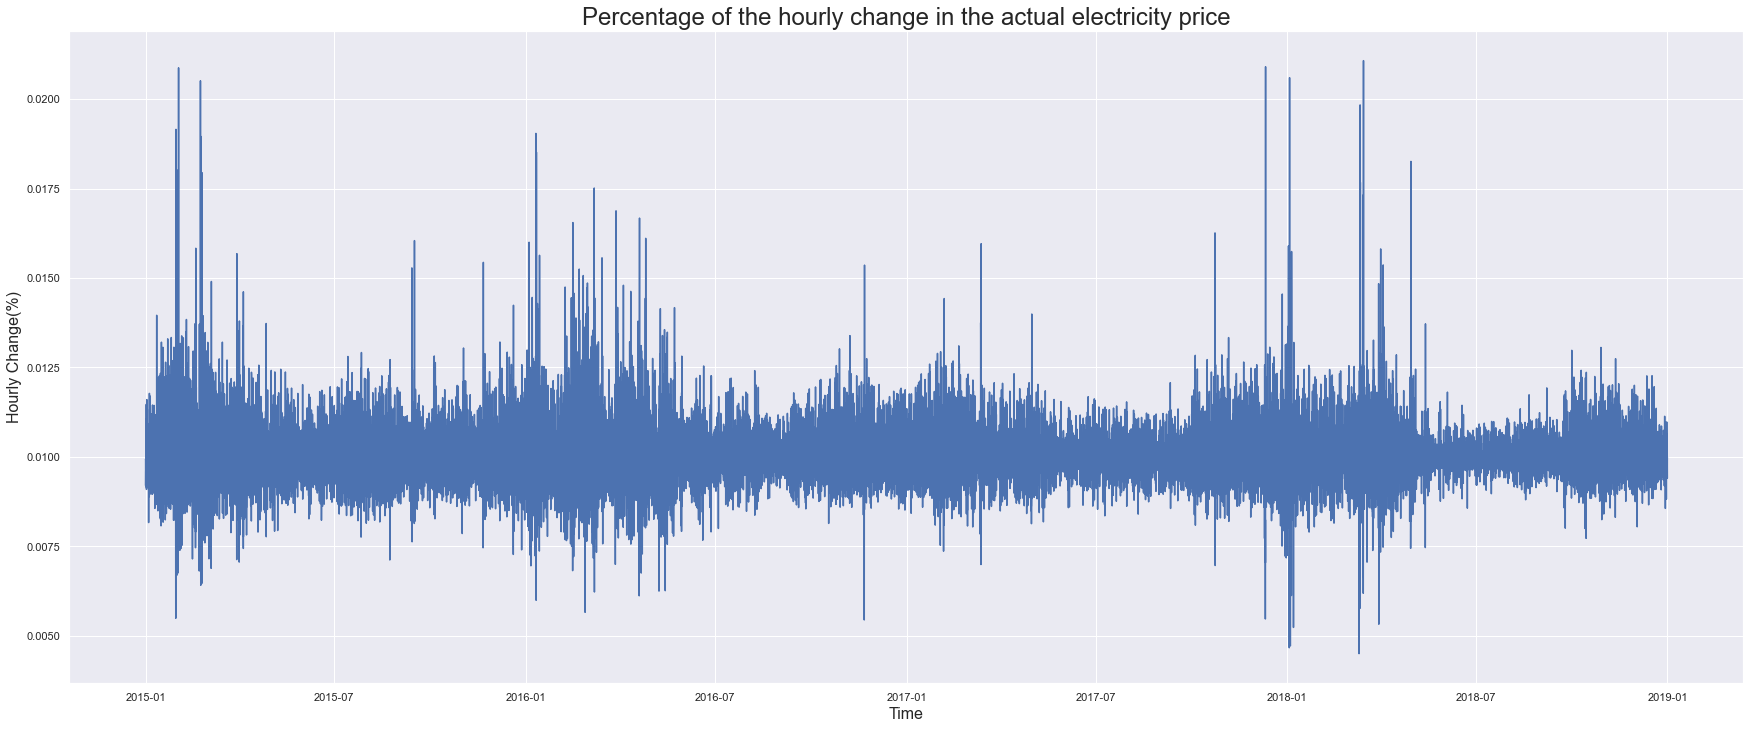

In [56]:
#Plot the percentage of the hourly change in the actual electricity price

hourly_change= dataframe_energy['price actual'].div(dataframe_energy['price actual'].shift(1).mul(100))
ax = plot_series(time_series=hourly_change, ylabel='Hourly Change(%)', 
                 title='Percentage of the hourly change in the actual electricity price')
plt.show()

Observations;
1) Hourly fluctuations vary from -25% (actual price * 0.75) and +25% (actual price * 1.25). 

2) Small ammount of outliers are seen when price is descreased by half (-50%) or doubled (+100%).

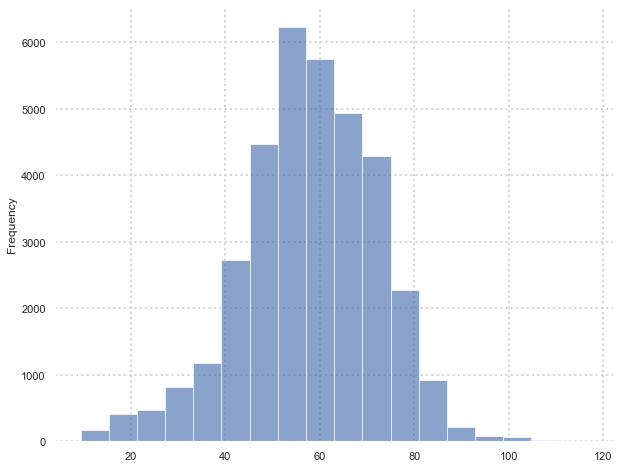

In [57]:
# Plot the histogram of the actual electricity price
# Normal distribution, meaning it could be standardized 
# Note: need to check weather the time series is stationary,
# in other words check whether the properties are independent from time

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

data = dataframe_energy['price actual']

plt.figure(figsize=(10,8))
ax = data.plot.hist(bins=18,alpha=0.65)
ax.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
ax.set_facecolor('white')
'''
# normal distribution curve
mean, sd = norm.fit(data) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mean, sd)
plt.plot(x, p, 'k', linewidth=3)
'''
#plt.ylim([0, 80])
plt.show()

### Stationary tests

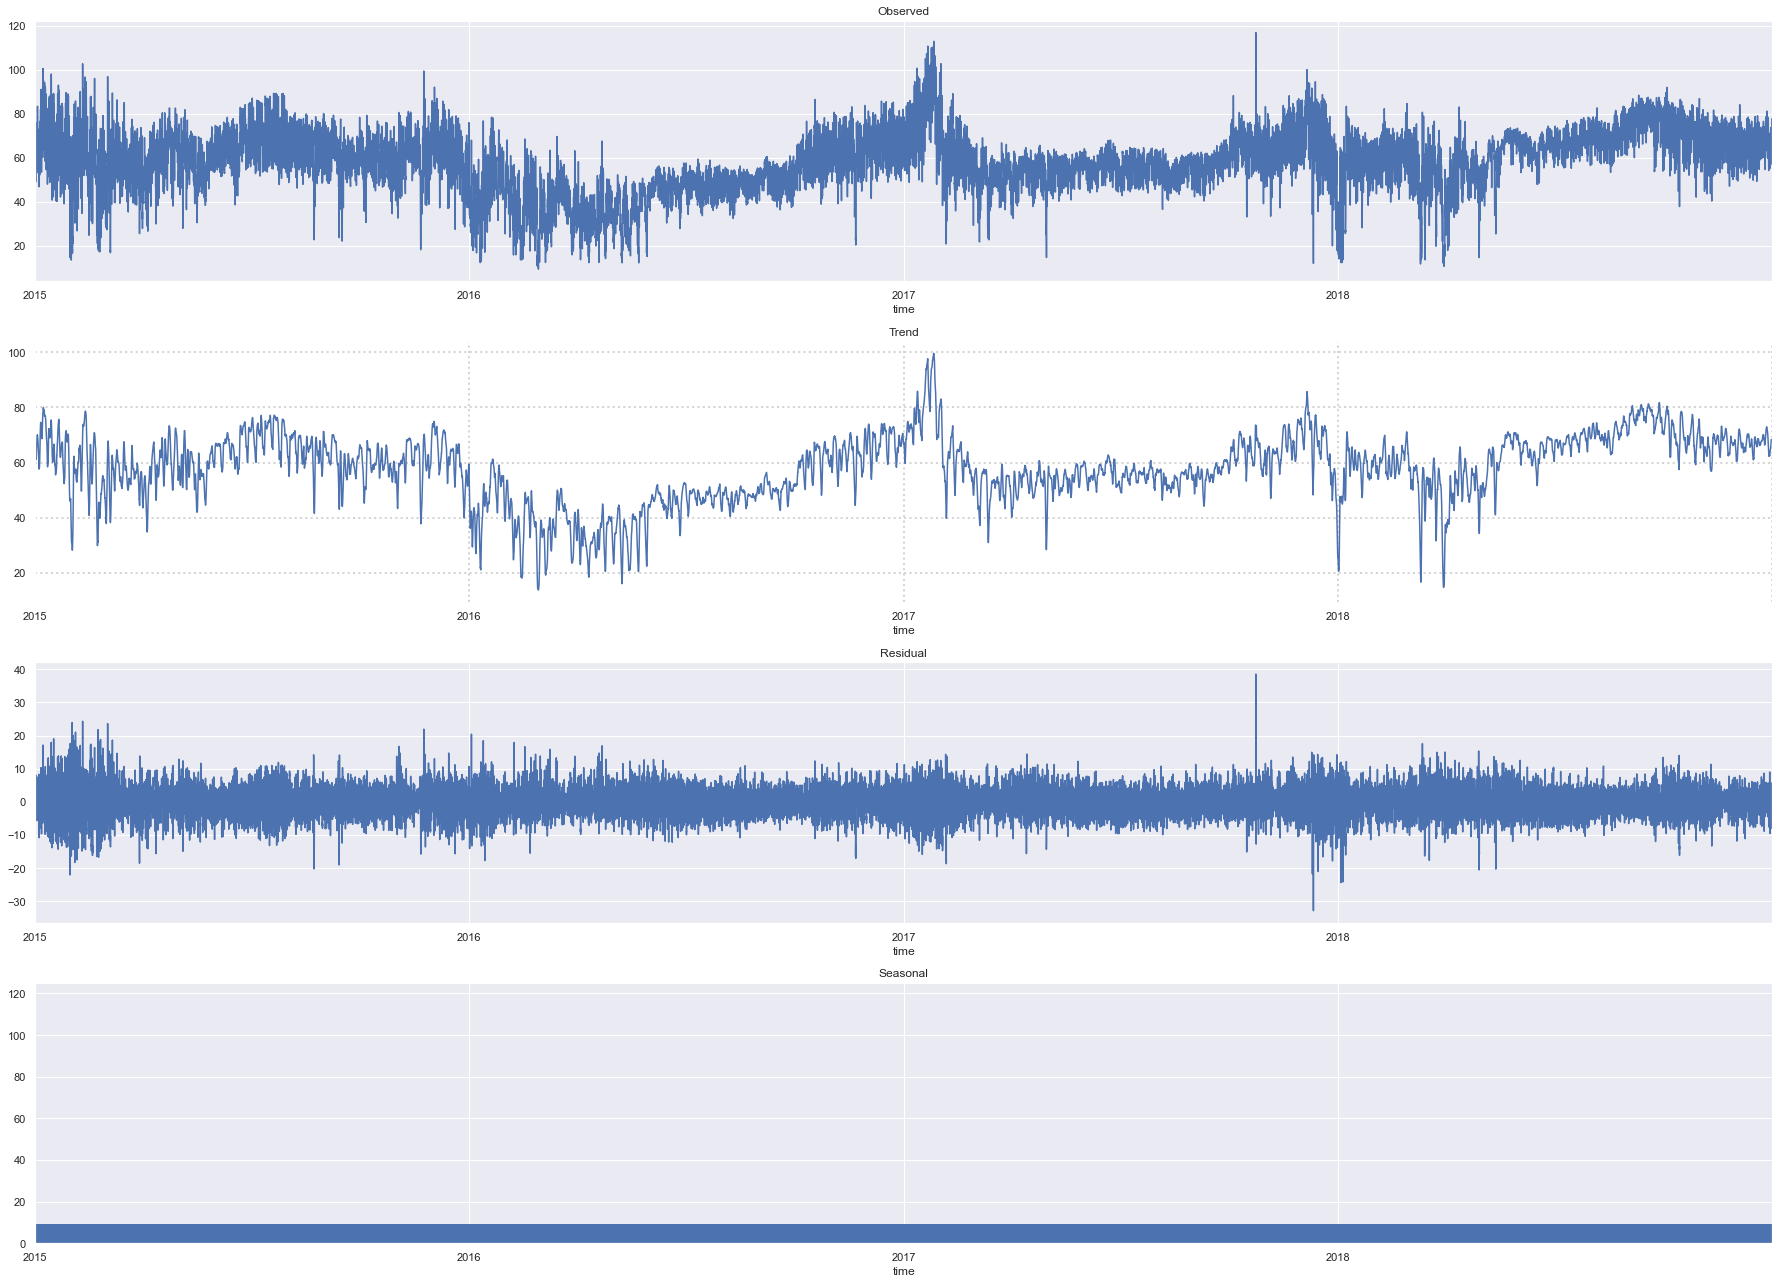

In [58]:
# Decomposition of the electricity price time series
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(dataframe_energy['price actual'], model='additive')
figure, (ax1, ax2, ax3, ax4) =plt.subplots(4,1, figsize=(25,18))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.resid.plot(ax=ax3, title='Residual')
decomposition.seasonal.plot(ax=ax4, title= 'Seasonal')
plt.tight_layout()
ax2.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
ax2.set_facecolor('white')
plt.ylim([0, 125])
#plt.xlim([2015,2019])
plt.show()

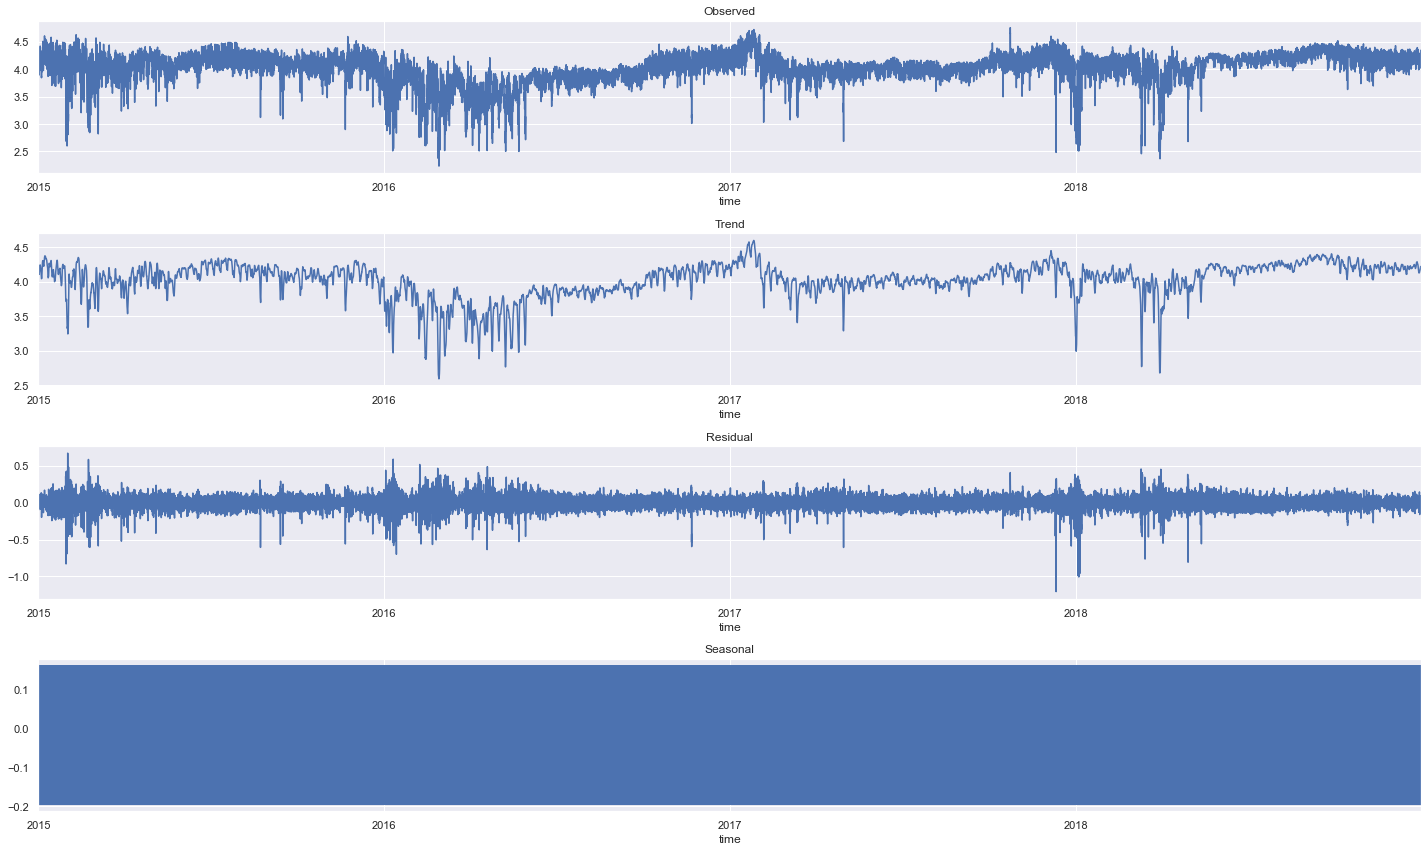

In [59]:
# Decomposition of the log electricity price time-series

decomposition= sm.tsa.seasonal_decompose(np.log(dataframe_energy['price actual']), model ='additive')
figure, (ax1, ax2, ax3, ax4) =plt.subplots(4,1, figsize=(20,12))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.resid.plot(ax=ax3, title='Residual')
decomposition.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [60]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test checks for stationarity
# Null Hypothesis: The time series is level (eg. stationary around a constant)
# Alternate Hypothesis: There is a unit root in the time series and thus is not stationary.
from statsmodels.tsa.stattools import kpss

y = final_dataframe['price actual']

kpss_test = kpss(y, regression='c', lags='legacy')

print('Kwiatkowski-Phillips-Schmidt-Shin test: {:.6f}\n p-value:{:.6f}\n #Lags used: {}'. format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value({}): {:.6f}'.format(key, value))


Kwiatkowski-Phillips-Schmidt-Shin test: 7.957007
 p-value:0.010000
 #Lags used: 52
Critical Value(10%): 0.347000
Critical Value(5%): 0.463000
Critical Value(2.5%): 0.574000
Critical Value(1%): 0.739000


<ipython-input-60-c22d14345b02>:8: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  kpss_test = kpss(y, regression='c', lags='legacy')
/Users/nikikaranikola/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


Kwiatkowski-Phillips-Schmidt-Shin test is 7.957007, which is a higher critical value at 1% (0.739), hence we cannot reject the null hypothesis with significant level 1%. This means that the time series is stationary.

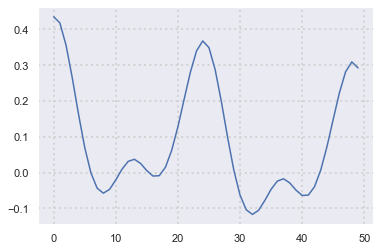

In [61]:
# Cross Correlation plot between electricity price and total load
from statsmodels.tsa.stattools import ccf

cross_correlation = ccf(final_dataframe['total load actual'], final_dataframe['price actual'])
ax = plt.plot(cross_correlation[0:50])
plt.grid(b=True, color = 'lightgrey', linewidth=2, linestyle=':')
#ax.set_facecolor('white')
#plt.ylim([0, 125])
plt.show()

There are many time lags with a correlation close to zero, hence could be ommitted. 

In [62]:
#Check correlations between electricity price and all features at each given hour.

correlations = final_dataframe.corr(method ='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
generation fossil oil                          0.285050
generation other renewable                     0.255551
pressure_Barcelona                             0.249177
pressure_Bilbao                                0.194063
generation waste                               0.168710
generation biomass                             0.142671
temp_min_Valencia                              0.133141
pressure_Valencia                              0.109812
temp_min_Barcelona                             0.103726
generation other                               0.099914
generation solar                               0.098529
temp_max_Madrid                                0

In [63]:
# Drop 'snow_3h_Barcelona' and 'snow_3h_Seville'

final_dataframe = final_dataframe.drop(['snow_3h_Seville', 'snow_3h_Barcelona'], axis=1)

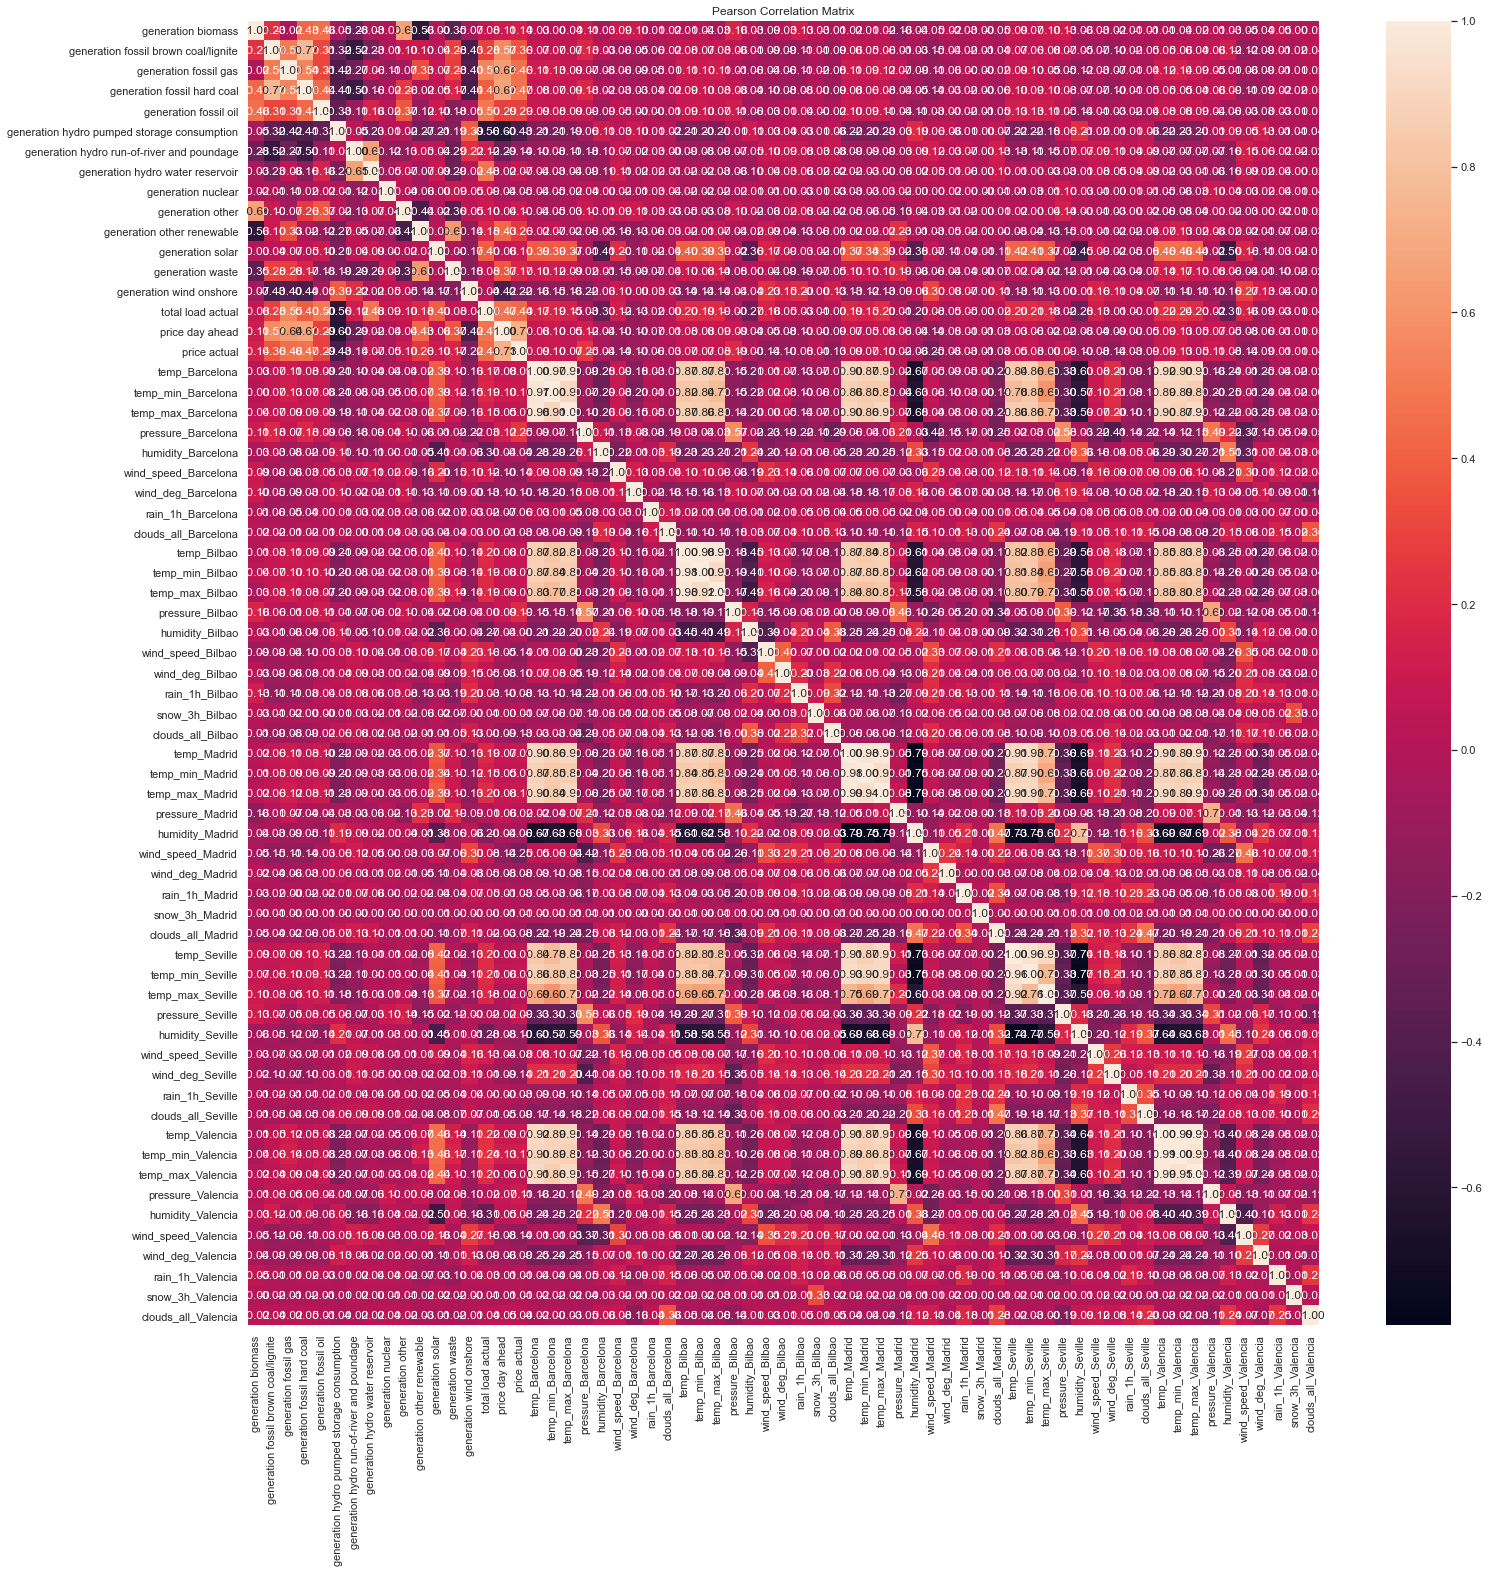

In [64]:
# Plot Pearson correlation matrix - Heatmap

correlations = final_dataframe.corr(method ='pearson')
figure = plt.figure(figsize=(24,24))
sns.heatmap(correlations, annot=True, fmt=' .2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [65]:
#Check closer the highly correlated features

highl_correlation = abs(correlations[correlations>0.75])
print(highl_correlation[highl_correlation<1.0].stack().to_string())

generation fossil brown coal/lignite  generation fossil hard coal             0.768831
generation fossil hard coal           generation fossil brown coal/lignite    0.768831
temp_Barcelona                        temp_min_Barcelona                      0.970264
                                      temp_max_Barcelona                      0.976904
                                      temp_Bilbao                             0.866727
                                      temp_min_Bilbao                         0.867970
                                      temp_max_Bilbao                         0.828347
                                      temp_Madrid                             0.903996
                                      temp_min_Madrid                         0.874548
                                      temp_max_Madrid                         0.899010
                                      temp_Seville                            0.841910
                                      temp_

Observations:
1) Electricity generation from fossil hard coal as well as generation fossil brown coal/lignite have the highest correlations
2) Temperature, particularly min and max temperature, have a high correlation. 

## Feature Engineering

In [66]:
# Create 'hour', 'weekday' and 'month' features

for i in range(len(final_dataframe)):
    position = final_dataframe.index[i] #position in dataframe
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    final_dataframe.loc[position, 'hour'] = hour
    final_dataframe.loc[position, 'weekday'] = weekday
    final_dataframe.loc[position, 'month'] = month
    if weekday == 6:
        final_dataframe.loc[position, 'weekday'] = 2
    elif weekday == 5:
        final_dataframe.loc[position, 'weekday'] = 1
    else:
        final_dataframe.loc[position, 'weekday'] = 0
        

In [67]:
# Create 'temperature_range' feature for each city
# temperature_range = temp_max - temp_min

cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(final_dataframe)):
    position = final_dataframe.index[i]
    for city in cities:
        temp_max = final_dataframe.loc[position, 'temp_max_{}'.format(city)]
        temp_min = final_dataframe.loc[position, 'temp_min_{}'.format(city)]
        final_dataframe.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)

In [68]:
# Create 'generation total coal' feature including all coal related sources 

final_dataframe['generation total coal'] = final_dataframe['generation fossil hard coal'] + final_dataframe['generation fossil brown coal/lignite']

### Feature Selection

In [69]:
X = final_dataframe[final_dataframe.columns.drop('price actual')].values

y = final_dataframe['price actual'].values

y = y.reshape(-1, 1) #returns a column of values 


## Analysis

### Random Forest Classifier

#### Split the datasets into a training set and a test set

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Training the Random Forest Classification model on the set

In [71]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

random_forest_model.fit(X_train, y_train)

# Prediction 
predicted_el_prices = random_forest_model.predict(X_test) 
np.set_printoptions(precision=2)
print(np.concatenate((predicted_el_prices.reshape(len(predicted_el_prices),1), y_test.reshape(len(y_test),1)),1))

<ipython-input-71-1dc1291eee2f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


[[48.13 48.19]
 [56.64 51.55]
 [59.97 59.58]
 ...
 [78.82 80.94]
 [68.86 71.2 ]
 [17.21 17.69]]


In [72]:
#both are in the form of 2D arrays
my_predicted_prices = predicted_el_prices.reshape(len(predicted_el_prices),1)
given_prices = y_test.reshape(len(y_test),1)
print(len(my_predicted_prices))

8766


In [73]:
#create a numpy dataframe of my predicted prices 
#my_predicted_prices[:,0]
new_dataframe = pd.DataFrame(my_predicted_prices, columns = ['Predicted Electricity prices'])
new_dataframe.head()

,Predicted Electricity prices
0,48.1281
1,56.6395
2,59.9711
3,42.6876
4,60.0242


<AxesSubplot:title={'center':'My predicitons'}, xlabel='Time', ylabel='Time'>

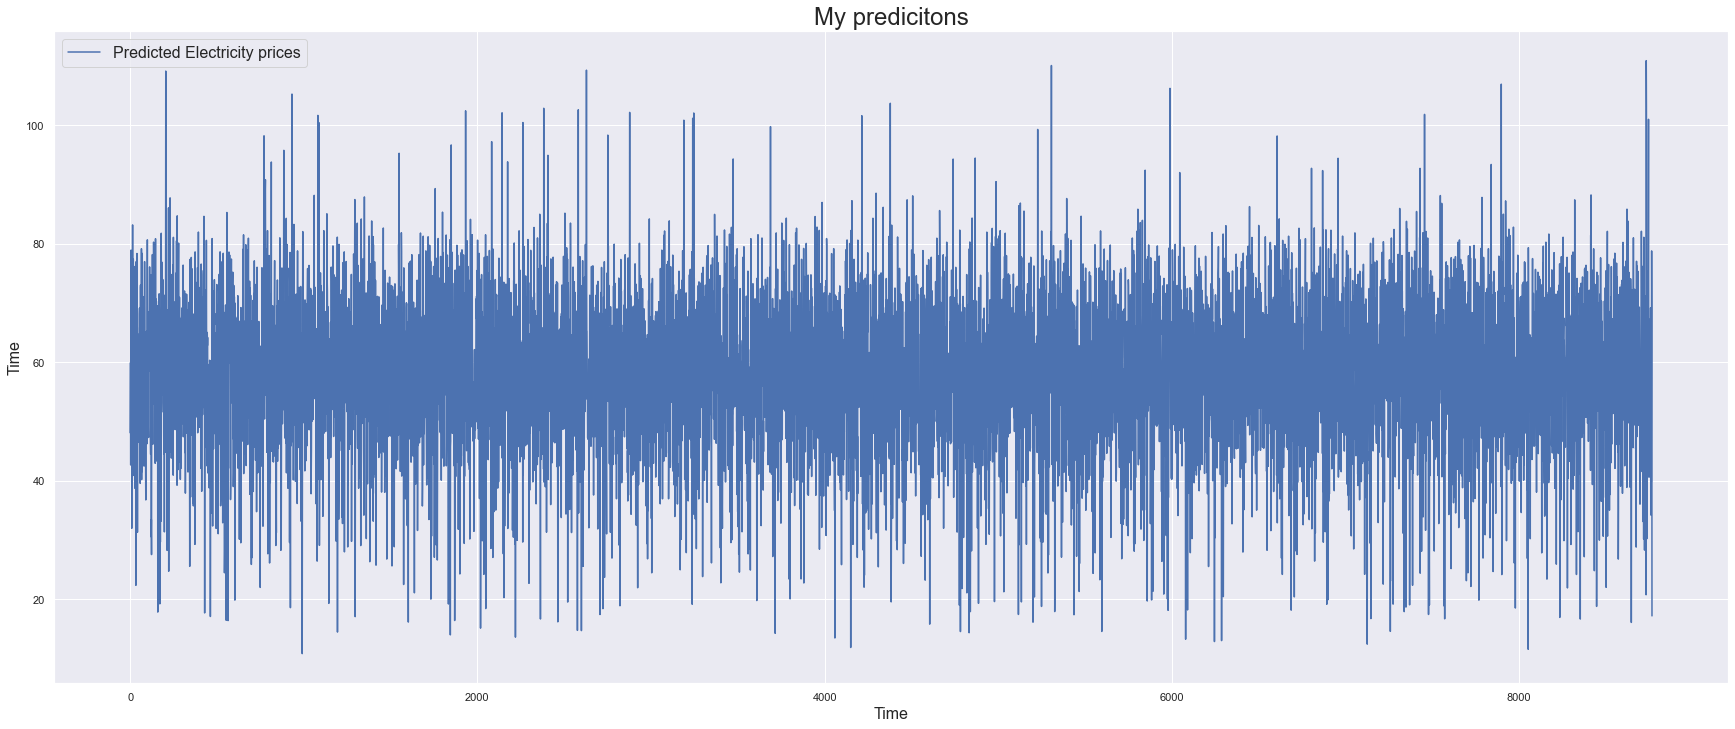

In [74]:
#plot my price predictions
plot_series(dataframe=new_dataframe, column='Predicted Electricity prices', 
                label= 'Predicted Electricity prices', ylabel='Time', title='My predicitons')

In [75]:
#create a numpy dataframe of y_test
y_test_dataframe = pd.DataFrame(given_prices, columns =['Given Electricity Prices'])
y_test_dataframe.head()

,Given Electricity Prices
0,48.19
1,51.55
2,59.58
3,42.71
4,64.44


<AxesSubplot:title={'center':'Given predicitons'}, xlabel='Time', ylabel='Time'>

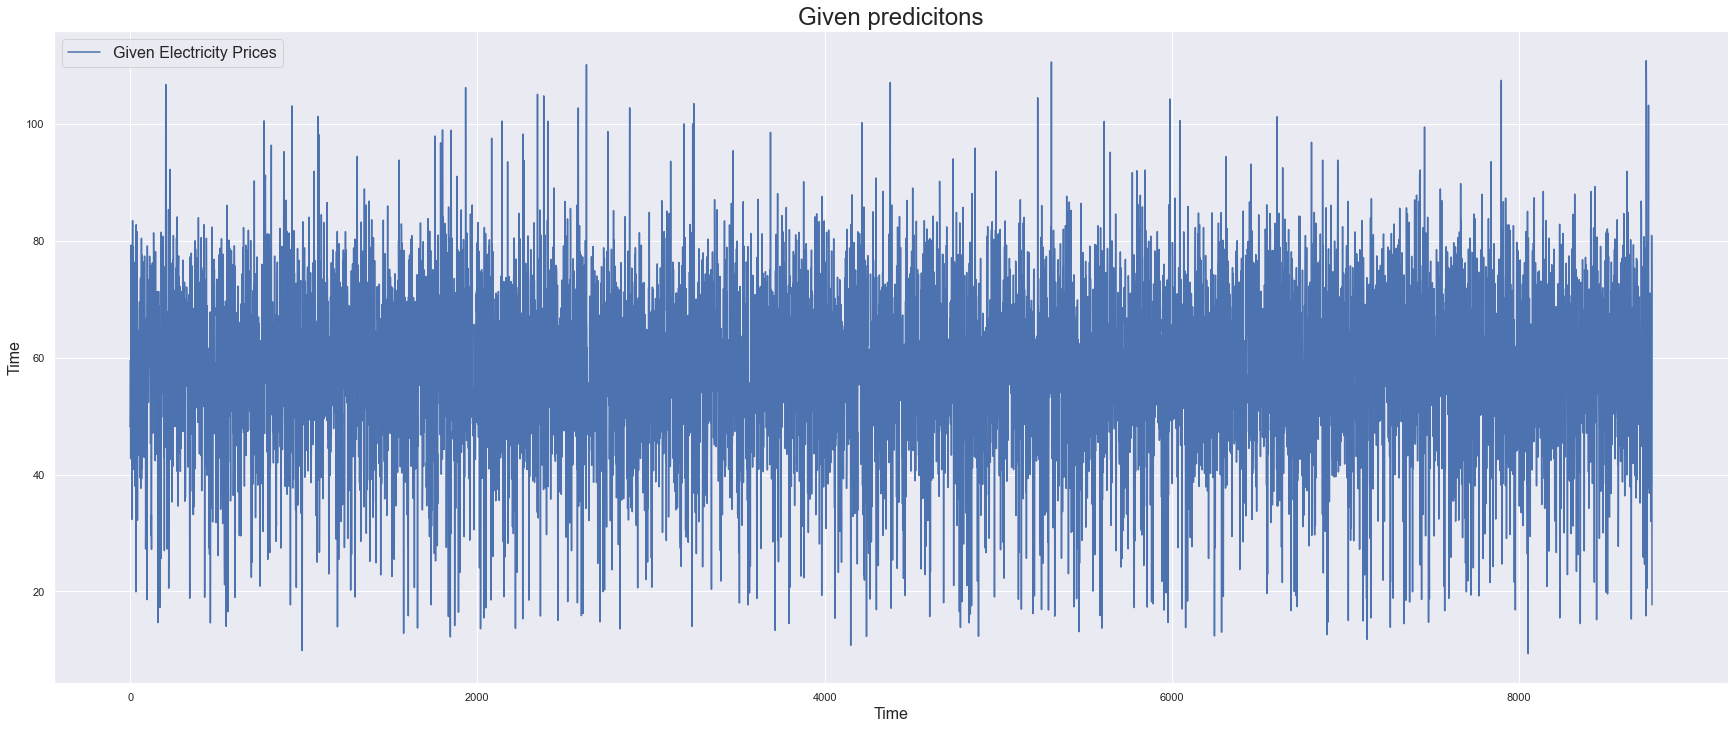

In [76]:
plot_series(dataframe=y_test_dataframe, column='Given Electricity Prices', 
                label= 'Given Electricity Prices', ylabel='Time', title='Given predicitons')

In [77]:
from sklearn.metrics import r2_score
# Evaluation of Prediction
r_squared = r2_score(y_test, predicted_el_prices)

print("Our r squared is {: } meaning our predictions are pretty accurate".format(r_squared))
evaluation = [(predicted_el_prices, 'prediction'), (r_squared, 'evaluation')]

Our r squared is  0.916517401593537 meaning our predictions are pretty accurate


### Support Vector Regression (SVR)

#### Feature Scaling 

In [78]:
from sklearn.preprocessing import StandardScaler

scalar_X = StandardScaler()
scalar_y = StandardScaler()
X_train = scalar_X.fit_transform(X_train)
y_train = scalar_y.fit_transform(y_train)

In [79]:
from sklearn.svm import SVR

support_vector_reg_model = SVR(kernel = 'rbf')
support_vector_reg_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = scalar_y.inverse_transform(support_vector_reg_model.predict(scalar_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


/Users/nikikaranikola/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[48.89 48.19]
 [55.38 51.55]
 [55.46 59.58]
 ...
 [77.36 80.94]
 [71.65 71.2 ]
 [22.02 17.69]]


#### Evaluation

In [80]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9051666051252524